
# Modelo K-Nearest Neighbors de la target RoundWinner



Integrantes:

*   Gonzalo Gallardo
*   Bárbara Palma Mena

Docente: Giocrisrai Godoy

Sección: MLY0100 - 002D


## Importe de librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier # Importamos KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report

In [ ]:
#Montar drive en el Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Llamar archivo desde el drive
file_path = "/content/drive/MyDrive/Machine Learning/csgo_datos_limpios.csv"
csgo = pd.read_csv(file_path, sep=",")

/tmp/ipython-input-3-685412595.py:3: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  csgo = pd.read_csv(file_path, sep=",")


## Análisis estadístico básico

In [ ]:
csgo.head()

,Map,Team,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,...,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,TotalGrenades,RoundDeaths,KDR
0,de_inferno,Terrorist,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,...,0,750,4400,0,0,0,0,4,1,0.0
1,de_inferno,Terrorist,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,...,0,800,4400,0,0,0,0,0,1,0.0
2,de_inferno,Terrorist,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,...,0,1000,4400,0,0,0,0,0,1,0.0
3,de_inferno,Terrorist,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,...,0,850,4400,0,0,0,0,0,1,0.0
4,de_inferno,Terrorist,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,...,0,1000,4400,0,0,0,0,2,0,0.0


In [ ]:
csgo.columns.tolist()

['Map',
 'Team',
 'RoundId',
 'RoundWinner',
 'MatchWinner',
 'Survived',
 'AbnormalMatch',
 'TimeAlive',
 'TravelledDistance',
 'RLethalGrenadesThrown',
 'RNonLethalGrenadesThrown',
 'PrimaryAssaultRifle',
 'PrimarySniperRifle',
 'PrimaryHeavy',
 'PrimarySMG',
 'PrimaryPistol',
 'FirstKillTime',
 'RoundKills',
 'RoundAssists',
 'RoundHeadshots',
 'RoundFlankKills',
 'RoundStartingEquipmentValue',
 'TeamStartingEquipmentValue',
 'MatchKills',
 'MatchFlankKills',
 'MatchAssists',
 'MatchHeadshots',
 'TotalGrenades',
 'RoundDeaths',
 'KDR']

In [ ]:
csgo.describe().T

,count,mean,std,min,25%,50%,75%,max
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0
PrimaryPistol,79157.0,0.221787,0.415451,0.0,0.0,0.0,0.0,1.0
RoundKills,79157.0,0.671349,0.881798,0.0,0.0,0.0,1.0,5.0
RoundAssists,79157.0,0.146178,0.385601,0.0,0.0,0.0,0.0,4.0


## Dividiendo el csv para entrenamiento y pruebas

In [ ]:
# Definimos el target o variable objetivo
target = 'RoundWinner'

# Definimos las variables predictoras
features = [
    'RoundKills',
    'RoundDeaths',
    'KDR',
    'TeamStartingEquipmentValue',
    'RLethalGrenadesThrown',
    'RNonLethalGrenadesThrown',
    'Map',
    'Team'
]

# Filtramos el DataFrame para quedarnos solo con filas donde 'RoundWinner' tenga valores válidos ('True' o 'False')
csgo = csgo[csgo['RoundWinner'].isin(['True', 'False'])]

# Creamos X con las variables predictoras y aplicamos one-hot encoding a las categóricas
X = csgo[features]
X = pd.get_dummies(X, columns=['Map', 'Team'])

# Creamos el vector objetivo y
y = csgo[target].replace({'True': 1, 'False': 0}).astype(int)

# Mostramos muestra para verificar
print(X.head())
print(y.head())

   RoundKills  RoundDeaths  KDR  TeamStartingEquipmentValue  \
0           0            1  0.0                        4400   
1           0            1  0.0                        4400   
2           0            1  0.0                        4400   
3           0            1  0.0                        4400   
4           0            0  0.0                        4400   

   RLethalGrenadesThrown  RNonLethalGrenadesThrown  Map_de_dust2  \
0                      0                         4         False   
1                      0                         0         False   
2                      0                         0         False   
3                      0                         0         False   
4                      1                         1         False   

   Map_de_inferno  Map_de_mirage  Map_de_nuke  Team_CounterTerrorist  \
0            True          False        False                  False   
1            True          False        False                  False

/tmp/ipython-input-7-1996762867.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = csgo[target].replace({'True': 1, 'False': 0}).astype(int)


In [ ]:
#Con test_size se divide 20% para pruebas y 80% entrenamiento
#Random_state garantiza que la partición sea la misma cada vez que se ejecute el notebook si se usa el mismo número en este caso 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Crear el modelo de K-Nearest Neighbors (usaremos k=5 como ejemplo inicial)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo con los datos escalados
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

## Evaluacion del modelo

In [ ]:
 # Importamos métricas de clasificación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generamos las predicciones del modelo de Random Forest usando el conjunto de prueba
y_pred = knn_model.predict(X_test_scaled)

# Calculamos las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir métricas en formato similar al de regresión
print(f"Accuracy : {accuracy:.2f}")     # Precisión general del modelo
print(f"Precision: {precision:.2f}")    # Exactitud de los positivos
print(f"Recall   : {recall:.2f}")       # Cobertura de los positivos
print(f"F1 Score : {f1:.2f}")           # Balance entre precisión y recall

Accuracy : 0.70
Precision: 0.71
Recall   : 0.68
F1 Score : 0.69


### **Metricas**

**Accuracy (Precisión general) (0.70):**
El modelo predice correctamente el resultado (Round Winner) el 70% de las veces. Este es un nivel moderado de precisión, lo que sugiere que tiene cierto poder predictivo, pero también comete errores una parte significativa del tiempo.

**Precision (0.70):** Cuando el modelo predice que un equipo ganará una ronda, acierta aproximadamente el 71% de las veces. Esto indica que cuando el modelo identifica una ronda como una "victoria" para un equipo, esa predicción es razonablemente confiable.

**Recall (Sensibilidad o Exhaustividad) (0.68):** El modelo identifica correctamente el 68% de todas las rondas que fueron realmente ganadas por un equipo. Esto significa que omite alrededor del 32% de las victorias verdaderas.

**F1 Score (0.70):**  El F1 score es una media armónica de Precision y Recall. Proporciona una única métrica que equilibra ambas. Un valor de 0.69 sugiere un equilibrio decente, aunque no sobresaliente, entre no predecir falsos positivos (Precision) y encontrar todos los verdaderos positivos (Recall).

## Visualizacion del modelo

### **Matriz de confusion**

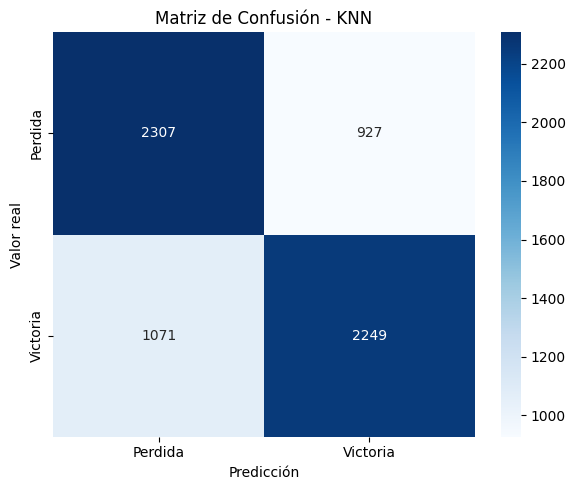

In [ ]:
#Generamos la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# Para visualizar la matriz de confusion con etiquetas
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Perdida', 'Victoria'], yticklabels=['Perdida', 'Victoria'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - KNN')
plt.tight_layout()
plt.show()

### **Curva ROC + AUC**

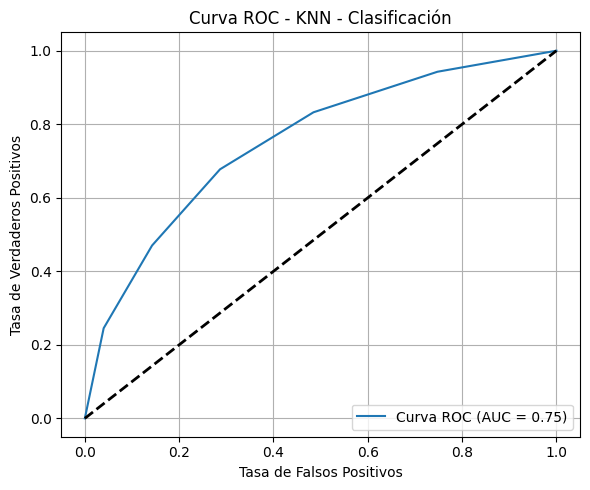

In [ ]:
y_prob = knn_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})') # Cambiamos la etiqueta si es necesario
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - KNN - Clasificación')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### **Reporte de clasificacion**

In [ ]:
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['Perdida', 'Victoria']))

Reporte de Clasificación:
              precision    recall  f1-score   support

     Perdida       0.68      0.71      0.70      3234
    Victoria       0.71      0.68      0.69      3320

    accuracy                           0.70      6554
   macro avg       0.70      0.70      0.70      6554
weighted avg       0.70      0.70      0.70      6554



### **Distribucion de probabilidades**

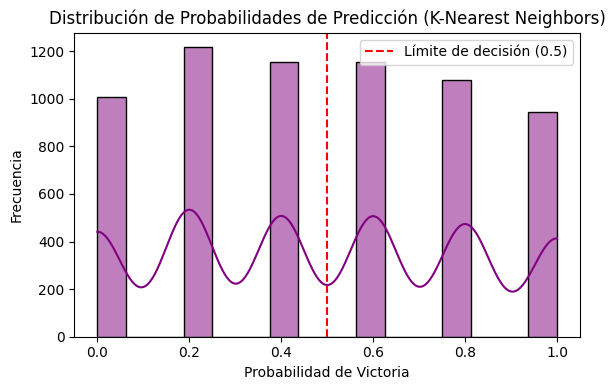

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(y_prob, kde=True, color='purple') # Usamos y_prob calculada antes
plt.title("Distribución de Probabilidades de Predicción (K-Nearest Neighbors)")
plt.xlabel("Probabilidad de Victoria")
plt.ylabel("Frecuencia")
plt.axvline(0.5, color='red', linestyle='--', label='Límite de decisión (0.5)')
plt.legend()
plt.tight_layout()
plt.show()

### **Analisis visual**

El **AUC** de 0.75 indica que el modelo tiene una capacidad razonable para distinguir entre clases, mejor que el azar, pero lejos de ser excelente.

El modelo tiene un cierto poder predictivo, pero no una separación fuerte entre clases.

La distribución está centrada cerca de 0.5 y bastante dispersa en todo el rango [0, 1].

Esto sugiere que el modelo KNN produce muchas predicciones ambiguas, es decir, con probabilidades cercanas a 0.5, en lugar de decisiones categóricas claras (cerca de 0 o 1).

La falta de concentración sugiere que las clases no son fácilmente separables con las características utilizadas, o que KNN no está capturando la estructura compleja del espacio de decisión.